In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
train_path = 'D:\\Data Analyst Internship\\Task_5\\train.csv' # update path if needed
test_path = 'D:\\Data Analyst Internship\\Task_5\\test.csv'
gender_path = 'D:\\Data Analyst Internship\\Task_5\\gender_submission.csv'
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
gender_sub = pd.read_csv(gender_path)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1) Structural Overview

In [2]:
# .info() and .describe()
df.info()
df.describe(include='all').transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## 2) Missing Values & Basic Counts

In [3]:
missing = df.isna().sum().sort_values(ascending=False)
missing

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [4]:
df['Survived'].value_counts(), df['Pclass'].value_counts(), df['Sex'].value_counts(), df['Embarked'].value_counts(dropna=False)

(Survived
 0    549
 1    342
 Name: count, dtype: int64,
 Pclass
 3    491
 1    216
 2    184
 Name: count, dtype: int64,
 Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Embarked
 S      644
 C      168
 Q       77
 NaN      2
 Name: count, dtype: int64)

## 3) Univariate Distributions

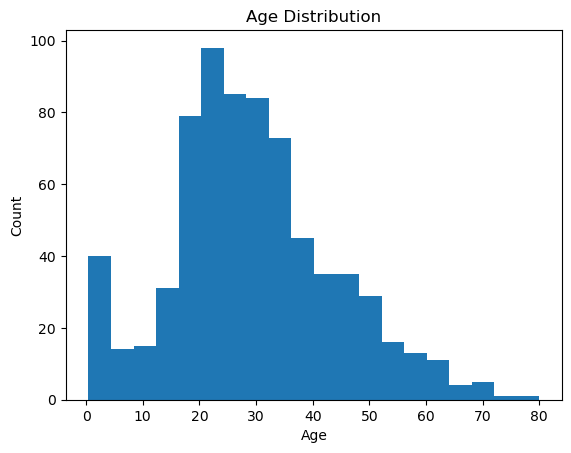

In [5]:
# Age histogram
df['Age'].dropna().plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age'); plt.ylabel('Count'); plt.show()


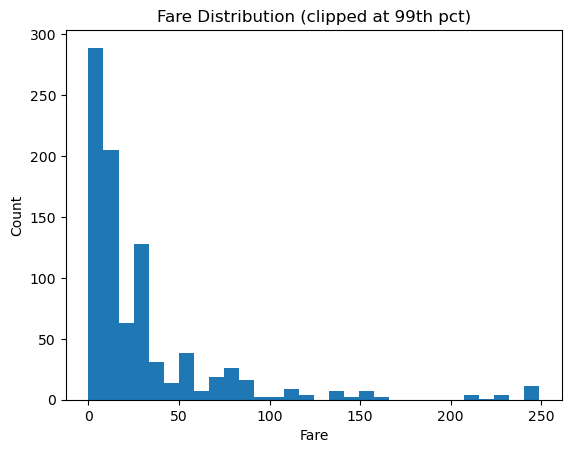

In [6]:
# Fare histogram (clipped for readability)
df['Fare'].clip(upper=df['Fare'].quantile(0.99)).plot(kind='hist', bins=30, title='Fare Distribution (clipped at 99th pct)')
plt.xlabel('Fare'); plt.ylabel('Count'); plt.show()


## 4) Survival Rates by Categories

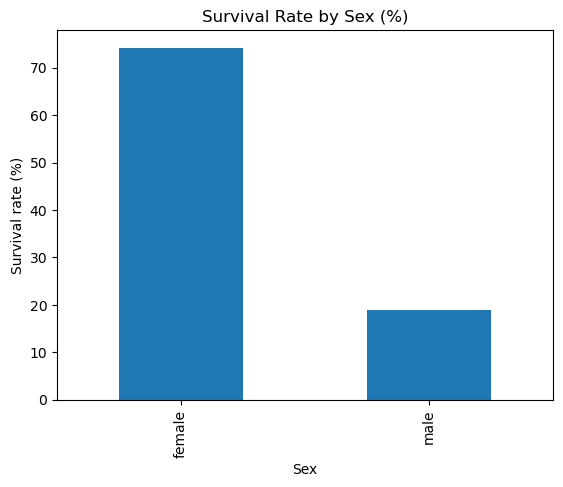

In [7]:
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
ax = survival_by_sex.plot(kind='bar', title='Survival Rate by Sex (%)')
plt.ylabel('Survival rate (%)'); plt.show()


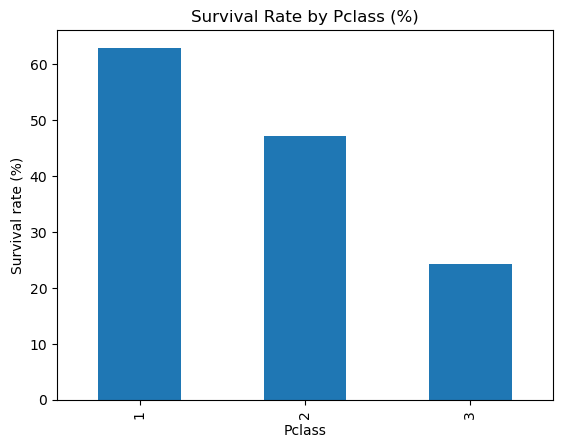

In [8]:
survival_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
ax = survival_by_pclass.plot(kind='bar', title='Survival Rate by Pclass (%)')
plt.ylabel('Survival rate (%)'); plt.xlabel('Pclass'); plt.show()


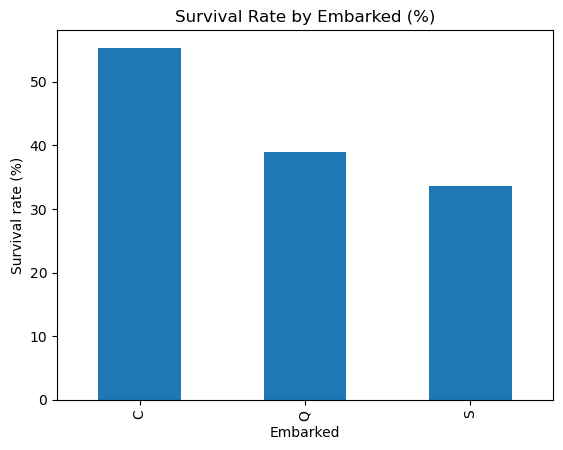

In [9]:
survival_by_embarked = df.dropna(subset=['Embarked']).groupby('Embarked')['Survived'].mean() * 100
ax = survival_by_embarked.plot(kind='bar', title='Survival Rate by Embarked (%)')
plt.ylabel('Survival rate (%)'); plt.xlabel('Embarked'); plt.show()


## 5) Relationships & Trends

C:\Users\USER\AppData\Local\Temp\ipykernel_12932\3911054225.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([age_died, age_surv], labels=['Died (0)', 'Survived (1)'])


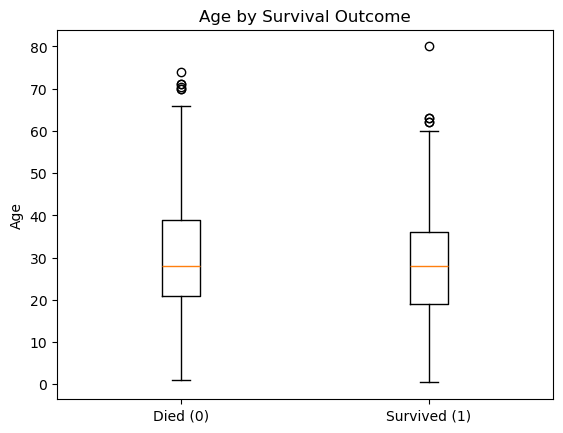

In [15]:
# Boxplot: Age vs Survival
age_died = df.loc[df['Survived']==0, 'Age'].dropna()
age_surv = df.loc[df['Survived']==1, 'Age'].dropna()

plt.boxplot([age_died, age_surv], labels=['Died (0)', 'Survived (1)'])
plt.title('Age by Survival Outcome'); plt.ylabel('Age'); plt.show()


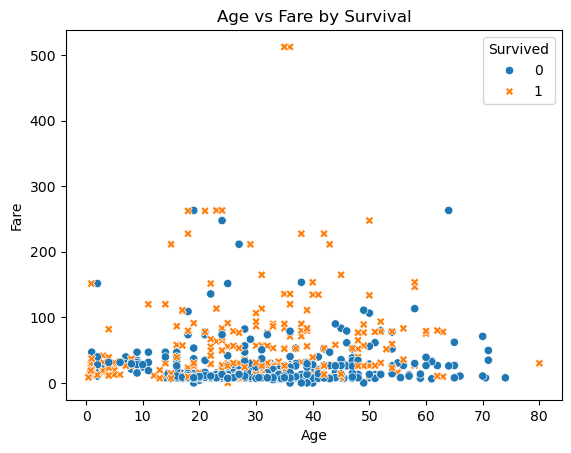

In [11]:
# Scatter: Age vs Fare with hue=Survived
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Survived')
plt.title('Age vs Fare by Survival'); plt.show()


## 6) Correlations

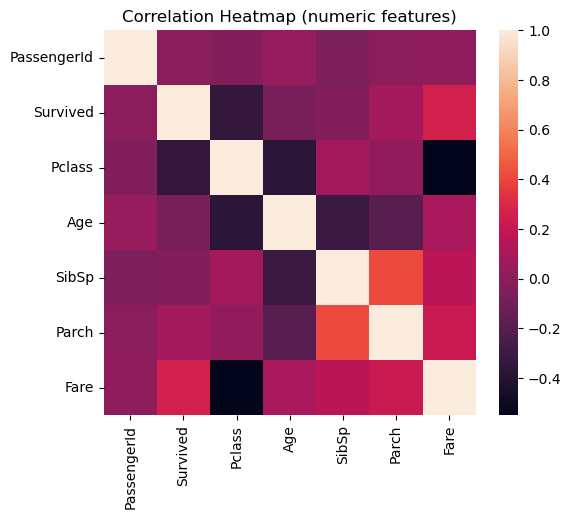

In [12]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False)
plt.title('Correlation Heatmap (numeric features)')
plt.show()


## 7) Notes & Findings
- Females and 1st class passengers have higher survival rates.
- Fares are right‑skewed; higher fares often correlate with higher survival (proxy for class).
- Age distributions differ by outcome; younger passengers show different survival patterns.
- Consider engineered features (e.g., `FamilySize = SibSp + Parch + 1`).
